In [2]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [12]:

df = pd.read_csv(r"C:\Users\iamda\Downloads\quikr_car.csv")
df.head()


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [13]:

df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Here Begin Data Cleaning part

In [15]:

df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')
df['name']


0         Hyundai Santro Xing
1         Mahindra Jeep CL550
2          Maruti Suzuki Alto
3           Hyundai Grand i10
4      Ford EcoSport Titanium
                ...          
887                        Ta
888              Tata Zest XM
889        Mahindra Quanto C8
890           Honda Amaze 1.2
891        Chevrolet Sail 1.2
Name: name, Length: 892, dtype: object

In [16]:


df = df[df['year'].str.isnumeric()]
df['year'] = df['year'].astype('int')

In [17]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


In [18]:

df['year'].unique()


array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [19]:

df['Price'].unique()


array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [20]:

df = df[df['Price']!='Ask For Price']
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2,Honda,2014,"1,80,000",Petrol,NaN


In [21]:

df['Price'] = df['Price'].str.replace(',','').astype('int')

In [22]:

df['kms_driven'] = df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [23]:

df = df[df['kms_driven']!='Petrol']

In [24]:

df['kms_driven'] = df['kms_driven'].astype('int')


C:\Users\iamda\AppData\Local\Temp\ipykernel_14344\3498888536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].astype('int')


In [25]:


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [26]:

df['fuel_type'].unique()


array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [27]:

df = df[~df['fuel_type'].isna()]

In [28]:

df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [29]:

df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [30]:
df = df[df['Price']<6e6]

# EDA Part

In [32]:

df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


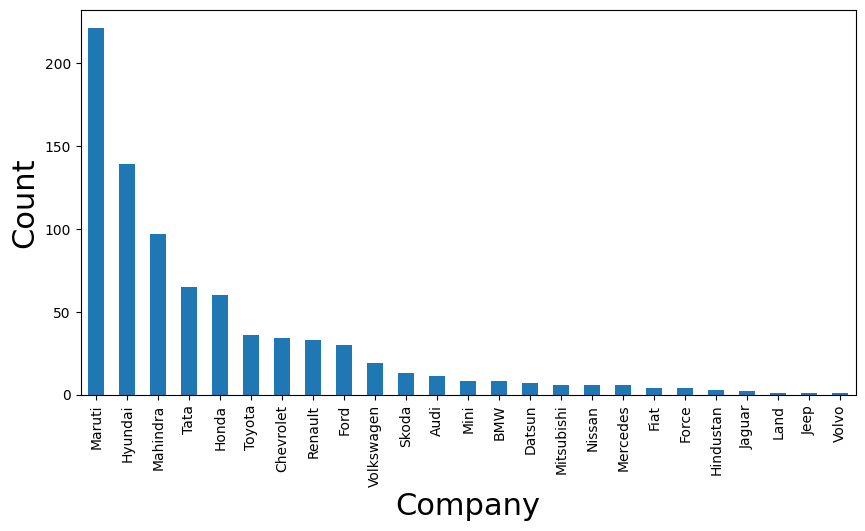

In [31]:

plt.figure(figsize=(10,5))
df['company'].value_counts().plot(kind='bar')
plt.xlabel('Company',size=22)
plt.ylabel('Count',size=22)
plt.show()


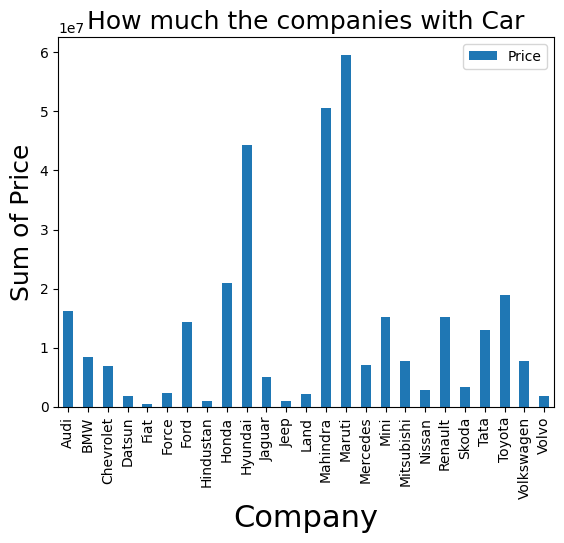

In [43]:
# Look that How much the companies with Car

df.groupby(['company'])['Price'].sum().to_frame().plot(kind='bar')
plt.title('How much the companies with Car',size=18)
plt.xlabel('Company',size=22)
plt.ylabel('Sum of Price',size=18)
plt.show()

<Figure size 1000x1000 with 0 Axes>

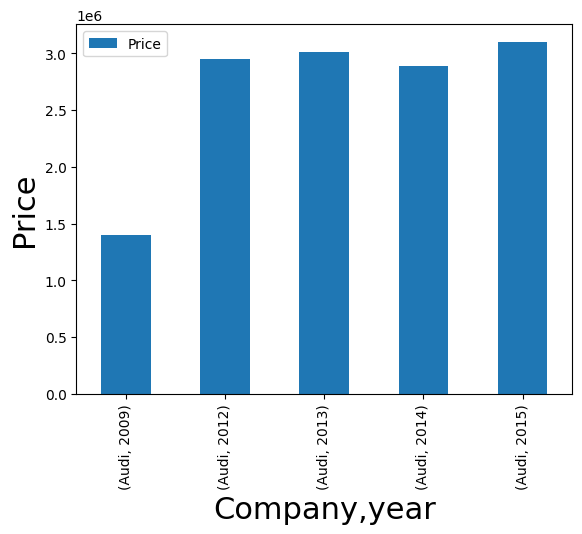

In [52]:

plt.figure(figsize=(10,10))
df.groupby(['company','year'])['Price'].sum()[:5].to_frame().plot(kind='bar')
plt.xlabel('Company,year',size=22)
plt.ylabel('Price',size=22)
plt.show()

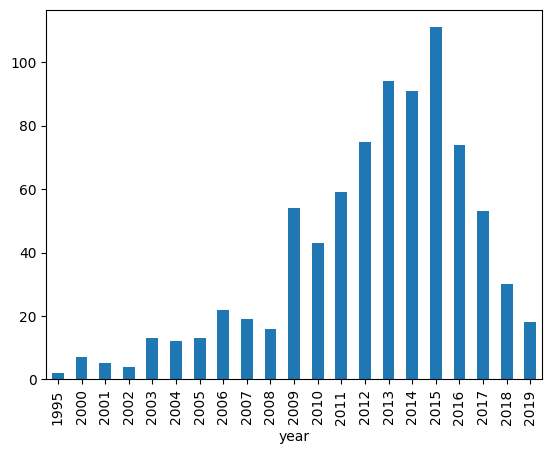

In [57]:

df.groupby(['year'])['fuel_type'].count().plot(kind='bar')

plt.show()

# Here Start Modeling Part

In [58]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pickle

ohe_name = OneHotEncoder()
ohe_name_un = ohe_name.fit_transform(df[['name']]).toarray()
ohe_name_df = pd.DataFrame(ohe_name_un,columns=ohe_name.get_feature_names_out())
ohe_name_df

,name_Audi A3 Cabriolet,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,name_Audi Q5 2.0,name_Audi Q7,name_BMW 3 Series,name_BMW 5 Series,name_BMW 7 Series,name_BMW X1,name_BMW X1 sDrive20d,name_BMW X1 xDrive20d,name_Chevrolet Beat,name_Chevrolet Beat Diesel,name_Chevrolet Beat LS,name_Chevrolet Beat LT,name_Chevrolet Beat PS,name_Chevrolet Cruze LTZ,name_Chevrolet Enjoy,name_Chevrolet Enjoy 1.4,name_Chevrolet Sail 1.2,name_Chevrolet Sail UVA,name_Chevrolet Spark,name_Chevrolet Spark 1.0,name_Chevrolet Spark LS,name_Chevrolet Spark LT,name_Chevrolet Tavera LS,name_Chevrolet Tavera Neo,name_Datsun GO T,name_Datsun Go Plus,name_Datsun Redi GO,name_Fiat Linea Emotion,name_Fiat Petra ELX,name_Fiat Punto Emotion,name_Force Motors Force,name_Force Motors One,name_Ford EcoSport,name_Ford EcoSport Ambiente,...,name_Tata Nano,name_Tata Nano Cx,name_Tata Nano GenX,name_Tata Nano LX,name_Tata Nano Lx,name_Tata Sumo Gold,name_Tata Sumo Grande,name_Tata Sumo Victa,name_Tata Tiago Revotorq,name_Tata Tiago Revotron,name_Tata Tigor Revotron,name_Tata Venture EX,name_Tata Vista Quadrajet,name_Tata Zest Quadrajet,name_Tata Zest XE,name_Tata Zest XM,name_Toyota Corolla,name_Toyota Corolla Altis,name_Toyota Corolla H2,name_Toyota Etios,name_Toyota Etios G,name_Toyota Etios GD,name_Toyota Etios Liva,name_Toyota Fortuner,name_Toyota Fortuner 3.0,name_Toyota Innova 2.0,name_Toyota Innova 2.5,name_Toyota Qualis,name_Volkswagen Jetta Comfortline,name_Volkswagen Jetta Highline,name_Volkswagen Passat Diesel,name_Volkswagen Polo,name_Volkswagen Polo Comfortline,name_Volkswagen Polo Highline,name_Volkswagen Polo Highline1.2L,name_Volkswagen Polo Trendline,name_Volkswagen Vento Comfortline,name_Volkswagen Vento Highline,name_Volkswagen Vento Konekt,name_Volvo S80 Summum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [59]:
with open('ohe_name.pkl','wb') as file:
    pickle.dump(ohe_name,file)

In [60]:

ohe_company = OneHotEncoder()
ohe_company_un = ohe_company.fit_transform(df[['company']]).toarray()
ohe_company_df = pd.DataFrame(ohe_company_un,columns=ohe_company.get_feature_names_out())
ohe_company_df

,company_Audi,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Force,company_Ford,company_Hindustan,company_Honda,company_Hyundai,company_Jaguar,company_Jeep,company_Land,company_Mahindra,company_Maruti,company_Mercedes,company_Mini,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [61]:
with open('ohe_company.pkl','wb') as file:
    pickle.dump(ohe_company,file)

In [62]:

ohe_fuel_type = OneHotEncoder()
ohe_fuel_type_un = ohe_fuel_type.fit_transform(df[['fuel_type']]).toarray()
ohe_fuel_type_df = pd.DataFrame(ohe_fuel_type_un,columns=ohe_fuel_type.get_feature_names_out())
ohe_fuel_type_df



,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
810,0.0,0.0,1.0
811,1.0,0.0,0.0
812,0.0,0.0,1.0
813,1.0,0.0,0.0


In [63]:
with open('ohe_fuel_type.pkl','wb') as file:
    pickle.dump(ohe_fuel_type,file)

In [64]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [65]:

df.describe()

,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


In [66]:

second_df = pd.concat([ohe_company_df,ohe_fuel_type_df,ohe_name_df],axis=1)
second_df

,company_Audi,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Force,company_Ford,company_Hindustan,company_Honda,company_Hyundai,company_Jaguar,company_Jeep,company_Land,company_Mahindra,company_Maruti,company_Mercedes,company_Mini,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,name_Audi A3 Cabriolet,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,name_Audi Q5 2.0,name_Audi Q7,name_BMW 3 Series,name_BMW 5 Series,name_BMW 7 Series,name_BMW X1,...,name_Tata Nano,name_Tata Nano Cx,name_Tata Nano GenX,name_Tata Nano LX,name_Tata Nano Lx,name_Tata Sumo Gold,name_Tata Sumo Grande,name_Tata Sumo Victa,name_Tata Tiago Revotorq,name_Tata Tiago Revotron,name_Tata Tigor Revotron,name_Tata Venture EX,name_Tata Vista Quadrajet,name_Tata Zest Quadrajet,name_Tata Zest XE,name_Tata Zest XM,name_Toyota Corolla,name_Toyota Corolla Altis,name_Toyota Corolla H2,name_Toyota Etios,name_Toyota Etios G,name_Toyota Etios GD,name_Toyota Etios Liva,name_Toyota Fortuner,name_Toyota Fortuner 3.0,name_Toyota Innova 2.0,name_Toyota Innova 2.5,name_Toyota Qualis,name_Volkswagen Jetta Comfortline,name_Volkswagen Jetta Highline,name_Volkswagen Passat Diesel,name_Volkswagen Polo,name_Volkswagen Polo Comfortline,name_Volkswagen Polo Highline,name_Volkswagen Polo Highline1.2L,name_Volkswagen Polo Trendline,name_Volkswagen Vento Comfortline,name_Volkswagen Vento Highline,name_Volkswagen Vento Konekt,name_Volvo S80 Summum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.

In [67]:

y = df['Price']
y

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
883    270000
885    110000
886    300000
888    260000
889    390000
Name: Price, Length: 815, dtype: int64

In [68]:

third_df = df.drop(['name','company','Price','fuel_type'],axis=1)
third_df

,year,kms_driven
0,2007,45000
1,2006,40
3,2014,28000
4,2014,36000
6,2012,41000
...,...,...
883,2011,50000
885,2009,30000
886,2009,132000
888,2018,27000


In [69]:

final_df = np.hstack((third_df,second_df))

In [70]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(final_df,y,test_size=0.2,random_state=42)

In [71]:

x_train


array([[  2013.,  38600.,      0., ...,      0.,      0.,      0.],
       [  2015., 100000.,      0., ...,      0.,      0.,      0.],
       [  2014.,  23000.,      0., ...,      0.,      0.,      0.],
       ...,
       [  2014.,  49000.,      0., ...,      0.,      0.,      0.],
       [  2017.,   4000.,      0., ...,      0.,      0.,      0.],
       [  2014.,  44000.,      0., ...,      0.,      0.,      0.]],
      shape=(652, 284))

In [72]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train_scaler

array([[ 0.17399933, -0.23657669, -0.12480514, ..., -0.05547002,
        -0.03919309,  0.        ],
       [ 0.66724961,  1.50380516, -0.12480514, ..., -0.05547002,
        -0.03919309,  0.        ],
       [ 0.42062447, -0.6787584 , -0.12480514, ..., -0.05547002,
        -0.03919309,  0.        ],
       ...,
       [ 0.42062447,  0.05821111, -0.12480514, ..., -0.05547002,
        -0.03919309,  0.        ],
       [ 1.16049988, -1.21731305, -0.12480514, ..., -0.05547002,
        -0.03919309,  0.        ],
       [ 0.42062447, -0.08351379, -0.12480514, ..., -0.05547002,
        -0.03919309,  0.        ]], shape=(652, 284))

In [73]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train_scaler,y_train)

lr_pred = lr.predict(x_test_scaler)

print(f'r2_score:{r2_score(y_test,lr_pred)}')


r2_score:0.5877666285285434


In [86]:
score=[]

for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(final_df,y,test_size=0.2,random_state=i)
    scaler = StandardScaler()
    x_train_scaler = scaler.fit_transform(x_train)
    x_test_scaler = scaler.transform(x_test)
    lr = LinearRegression()
    lr.fit(x_train_scaler,y_train)

    lr_pred = lr.predict(x_test_scaler)

    print(f'r2_score:{r2_score(y_test,lr_pred)}')

    score.append(r2_score(y_test,lr_pred))
    

r2_score:0.7641638537043304
r2_score:0.4668984481771381
r2_score:0.6827331084928525
r2_score:0.6152493517403544
r2_score:0.8589518687195975
r2_score:0.7384319029228888
r2_score:0.6351678062893664
r2_score:0.709567288659496
r2_score:0.7159120312862202
r2_score:0.7166598892147368
r2_score:0.7245573242646618
r2_score:0.6768809665359847
r2_score:0.5475947545276354
r2_score:0.7252569138898459
r2_score:0.6626969330282582
r2_score:0.7104045861167949
r2_score:0.507092062413318
r2_score:0.7308777354694397
r2_score:0.6520660398522269
r2_score:0.604485817661905
r2_score:0.6048189833139479
r2_score:0.6092896681385134
r2_score:0.7809746071998326
r2_score:0.6159554852628686
r2_score:0.5580314117936115
r2_score:0.4618187493850592
r2_score:0.6221334557210417
r2_score:0.791053602031728
r2_score:0.8019793230017849
r2_score:0.5464631052075304
r2_score:0.5322163099384754
r2_score:0.6051535307751739
r2_score:0.7401504815046767
r2_score:0.758551268288023
r2_score:0.4658540699513529
r2_score:0.60056788701980

In [88]:

np.argmax(score)

np.int64(124)

In [75]:
score=[]

for i in range(500):
    x_train,x_test,y_train,y_test=train_test_split(final_df,y,test_size=0.2,random_state=i)
    scaler = StandardScaler()
    x_train_scaler = scaler.fit_transform(x_train)
    x_test_scaler = scaler.transform(x_test)
    RR = RandomForestRegressor()
    RR.fit(x_train_scaler,y_train)

    rr_pred = RR.predict(x_test_scaler)

    print(f'r2_score:{r2_score(y_test,rr_pred)}')

    score.append(r2_score(y_test,rr_pred))
    

r2_score:0.6976381829307658
r2_score:0.5539079532353606
r2_score:0.6804772153982468
r2_score:0.6632698530657039
r2_score:0.8858192279025179
r2_score:0.7001295402295199
r2_score:0.6261673610244363
r2_score:0.6300706620660594
r2_score:0.6931142734696645
r2_score:0.6631396737391249
r2_score:0.6832633567679633
r2_score:0.5984654368294341
r2_score:0.5620838176784527
r2_score:0.7022046369677946
r2_score:0.689857465106398
r2_score:0.7780839237795252
r2_score:0.5552674199270976
r2_score:0.6454082852385412
r2_score:0.6608176777250618
r2_score:0.6667091543240213
r2_score:0.5435430759124915
r2_score:0.6443727621042445
r2_score:0.7767760407998178
r2_score:0.6484819236656829
r2_score:0.569901003216243
r2_score:0.4803340836626635
r2_score:0.7267417243755963
r2_score:0.8535417523155732
r2_score:0.769911832340428
r2_score:0.5877984567424326
r2_score:0.6046578704679623
r2_score:0.6571792888191792
r2_score:0.8351591088351964
r2_score:0.8003924461152443
r2_score:0.44451368544419567
r2_score:0.66027636589

In [77]:
np.argmax(score)

np.int64(4)

In [79]:

x_train,x_test,y_train,y_test=train_test_split(final_df,y,test_size=0.2,random_state=4)
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)
lr = RandomForestRegressor(n_estimators=100)
lr.fit(x_train_scaler,y_train)

lr_pred = lr.predict(x_test_scaler)

print(f'r2_score:{r2_score(y_test,lr_pred)}')

    

r2_score:0.8798091566682342


In [89]:

x_train,x_test,y_train,y_test=train_test_split(final_df,y,test_size=0.2,random_state=124)
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_scaler,y_train)

lr_pred = lr.predict(x_test_scaler)

print(f'r2_score:{r2_score(y_test,lr_pred)}')

    
    

r2_score:0.8931103904959424


In [90]:

with open('linear.pkl','wb') as file:
    pickle.dump(lr,file)

In [94]:

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)
    